<a href="https://colab.research.google.com/github/HeshamAhmedd/TensorFlowClassification/blob/main/TensorFlowClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build Model
# ----------------------------------------------------
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),            # Input layer
    layers.Dense(256, activation='relu'),            # Hidden layer
    layers.Dropout(0.3),                             # Dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')           # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile Model
# ----------------------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train Model
# ----------------------------------------------------
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7451 - loss: 0.7129 - val_accuracy: 0.8380 - val_loss: 0.4267
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8439 - loss: 0.4234 - val_accuracy: 0.8630 - val_loss: 0.3719
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8590 - loss: 0.3814 - val_accuracy: 0.8740 - val_loss: 0.3476
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8690 - loss: 0.3525 - val_accuracy: 0.8738 - val_loss: 0.3503
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8762 - loss: 0.3357 - val_accuracy: 0.8812 - val_loss: 0.3249
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8833 - loss: 0.3197 - val_accuracy: 0.8743 - val_loss: 0.3457
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8807 - loss: 0.3186 - val_accuracy: 0.8817 - val_loss: 0.3242
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8856 - loss: 0.3086 - val_accuracy: 0

In [ ]:
# Evaluate Model on Test Data
# ----------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.8833
📉 Test Loss: 0.3297


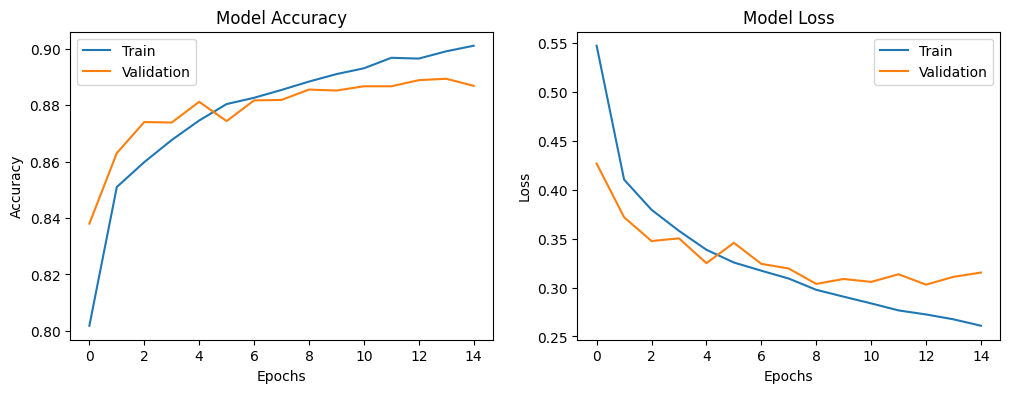

In [9]:
# Training Curves: Accuracy & Loss
# ----------------------------------------------------
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


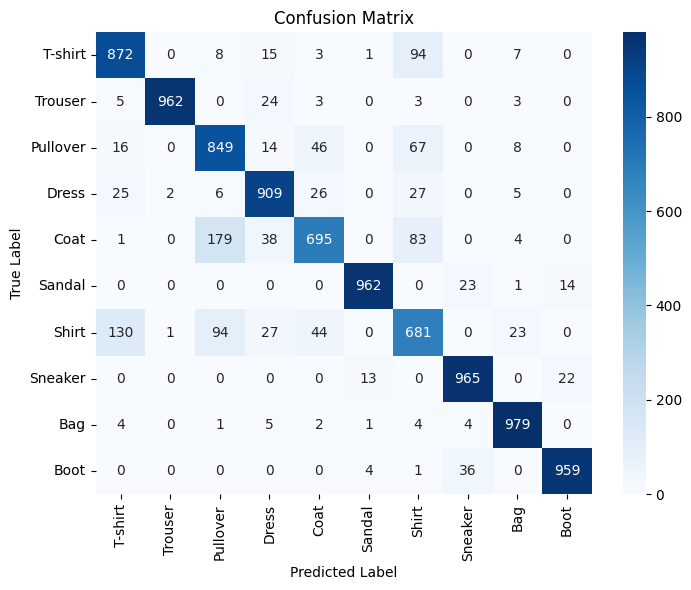


📊 Classification Report:

              precision    recall  f1-score   support

     T-shirt       0.83      0.87      0.85      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.75      0.85      0.79      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.85      0.69      0.76      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.68      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.95      0.98      0.96      1000
        Boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Confusion Matrix & Classification Report
# ----------------------------------------------------
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))
